<a href="https://colab.research.google.com/github/ichaelo/ML-LAB/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5(odobreno).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [2]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

Целевая переменная - price (будем предсказывать цены на машину)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Старт EDA'ы для числовых признаков

<ipython-input-4-dbc0345520d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

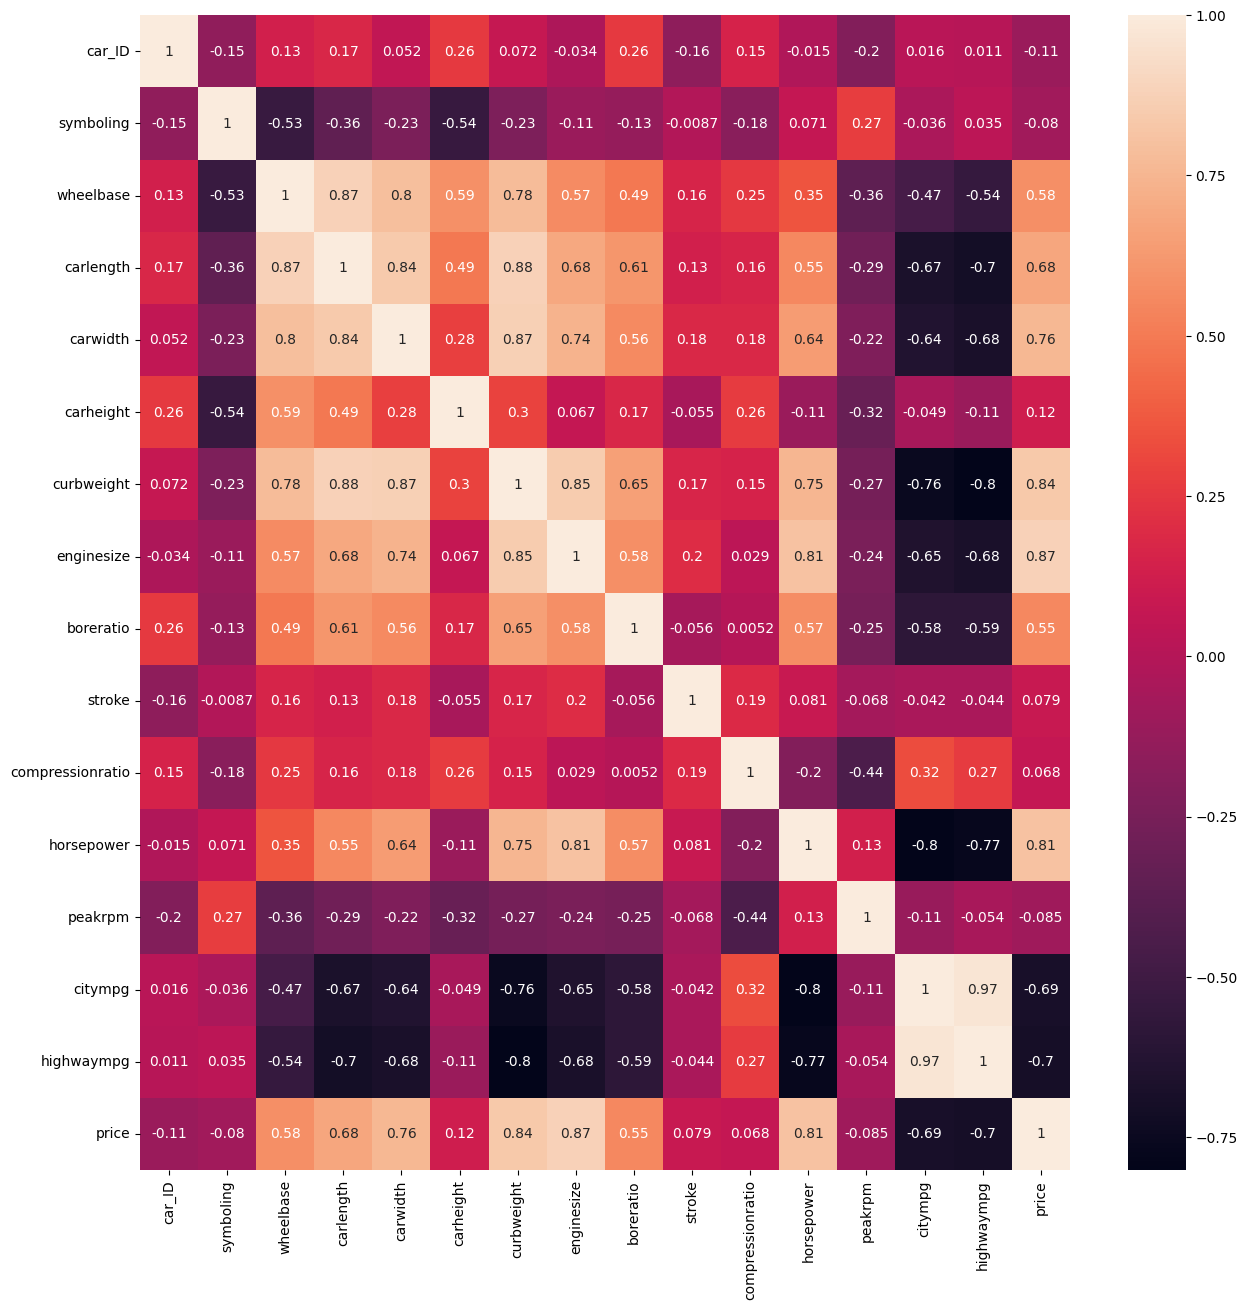

In [4]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [5]:
df.corr()['price']

<ipython-input-5-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

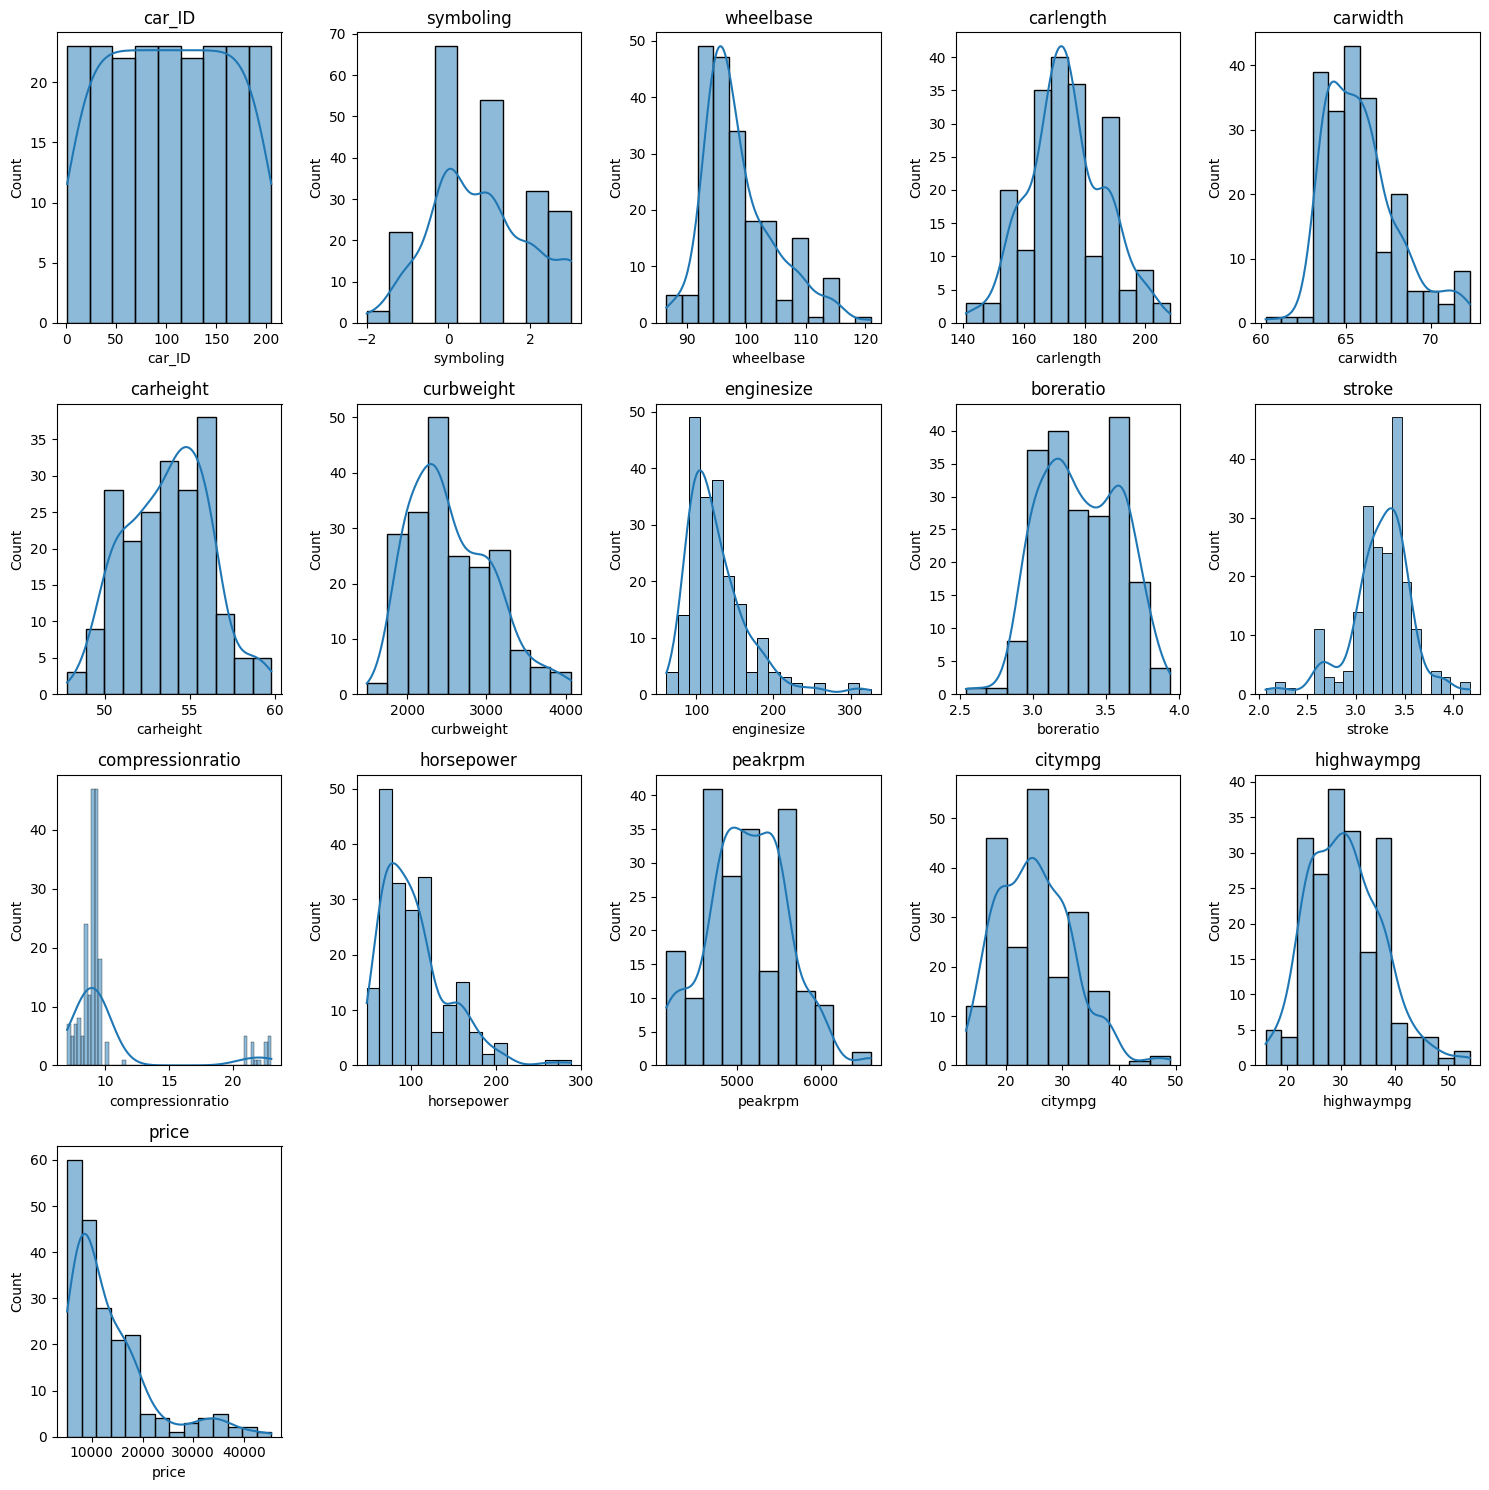

In [6]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

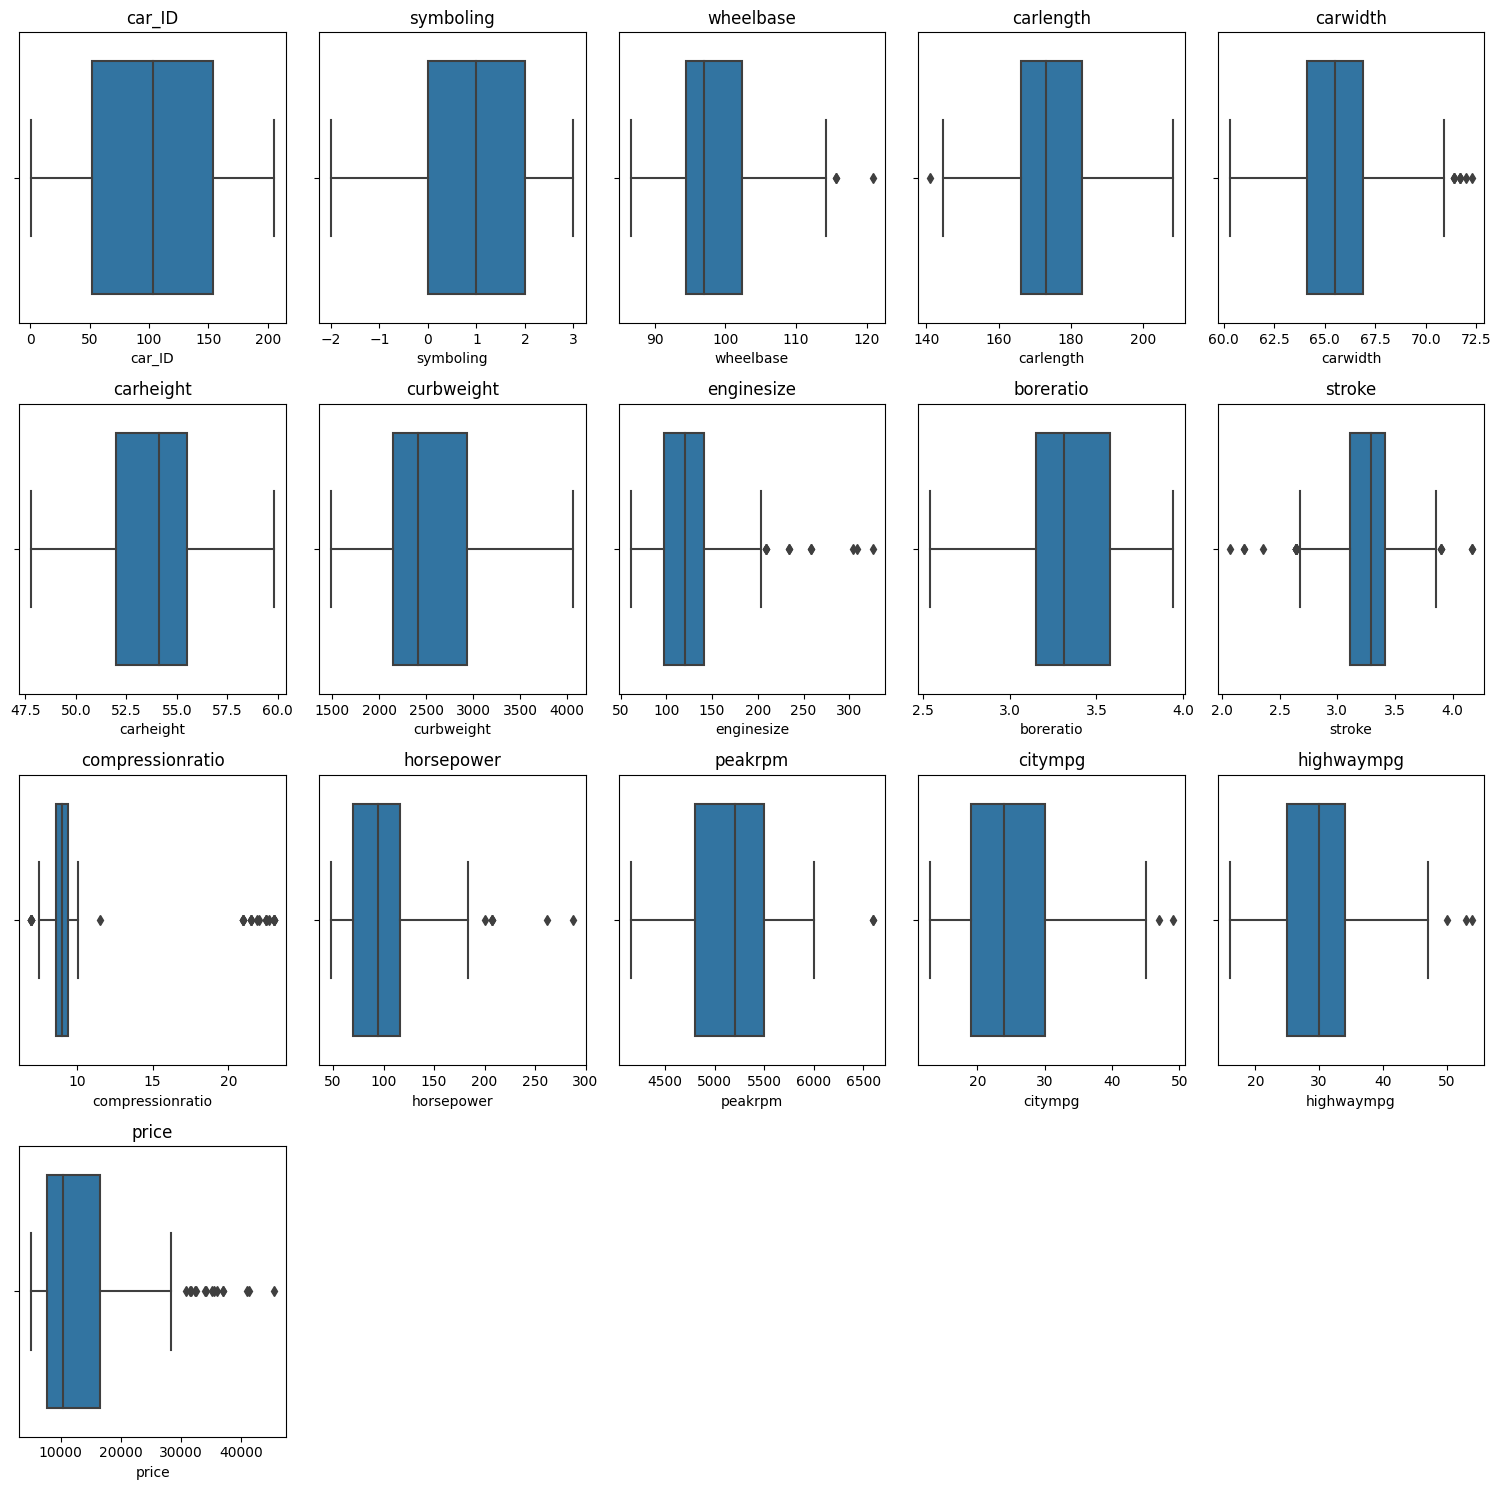

In [7]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

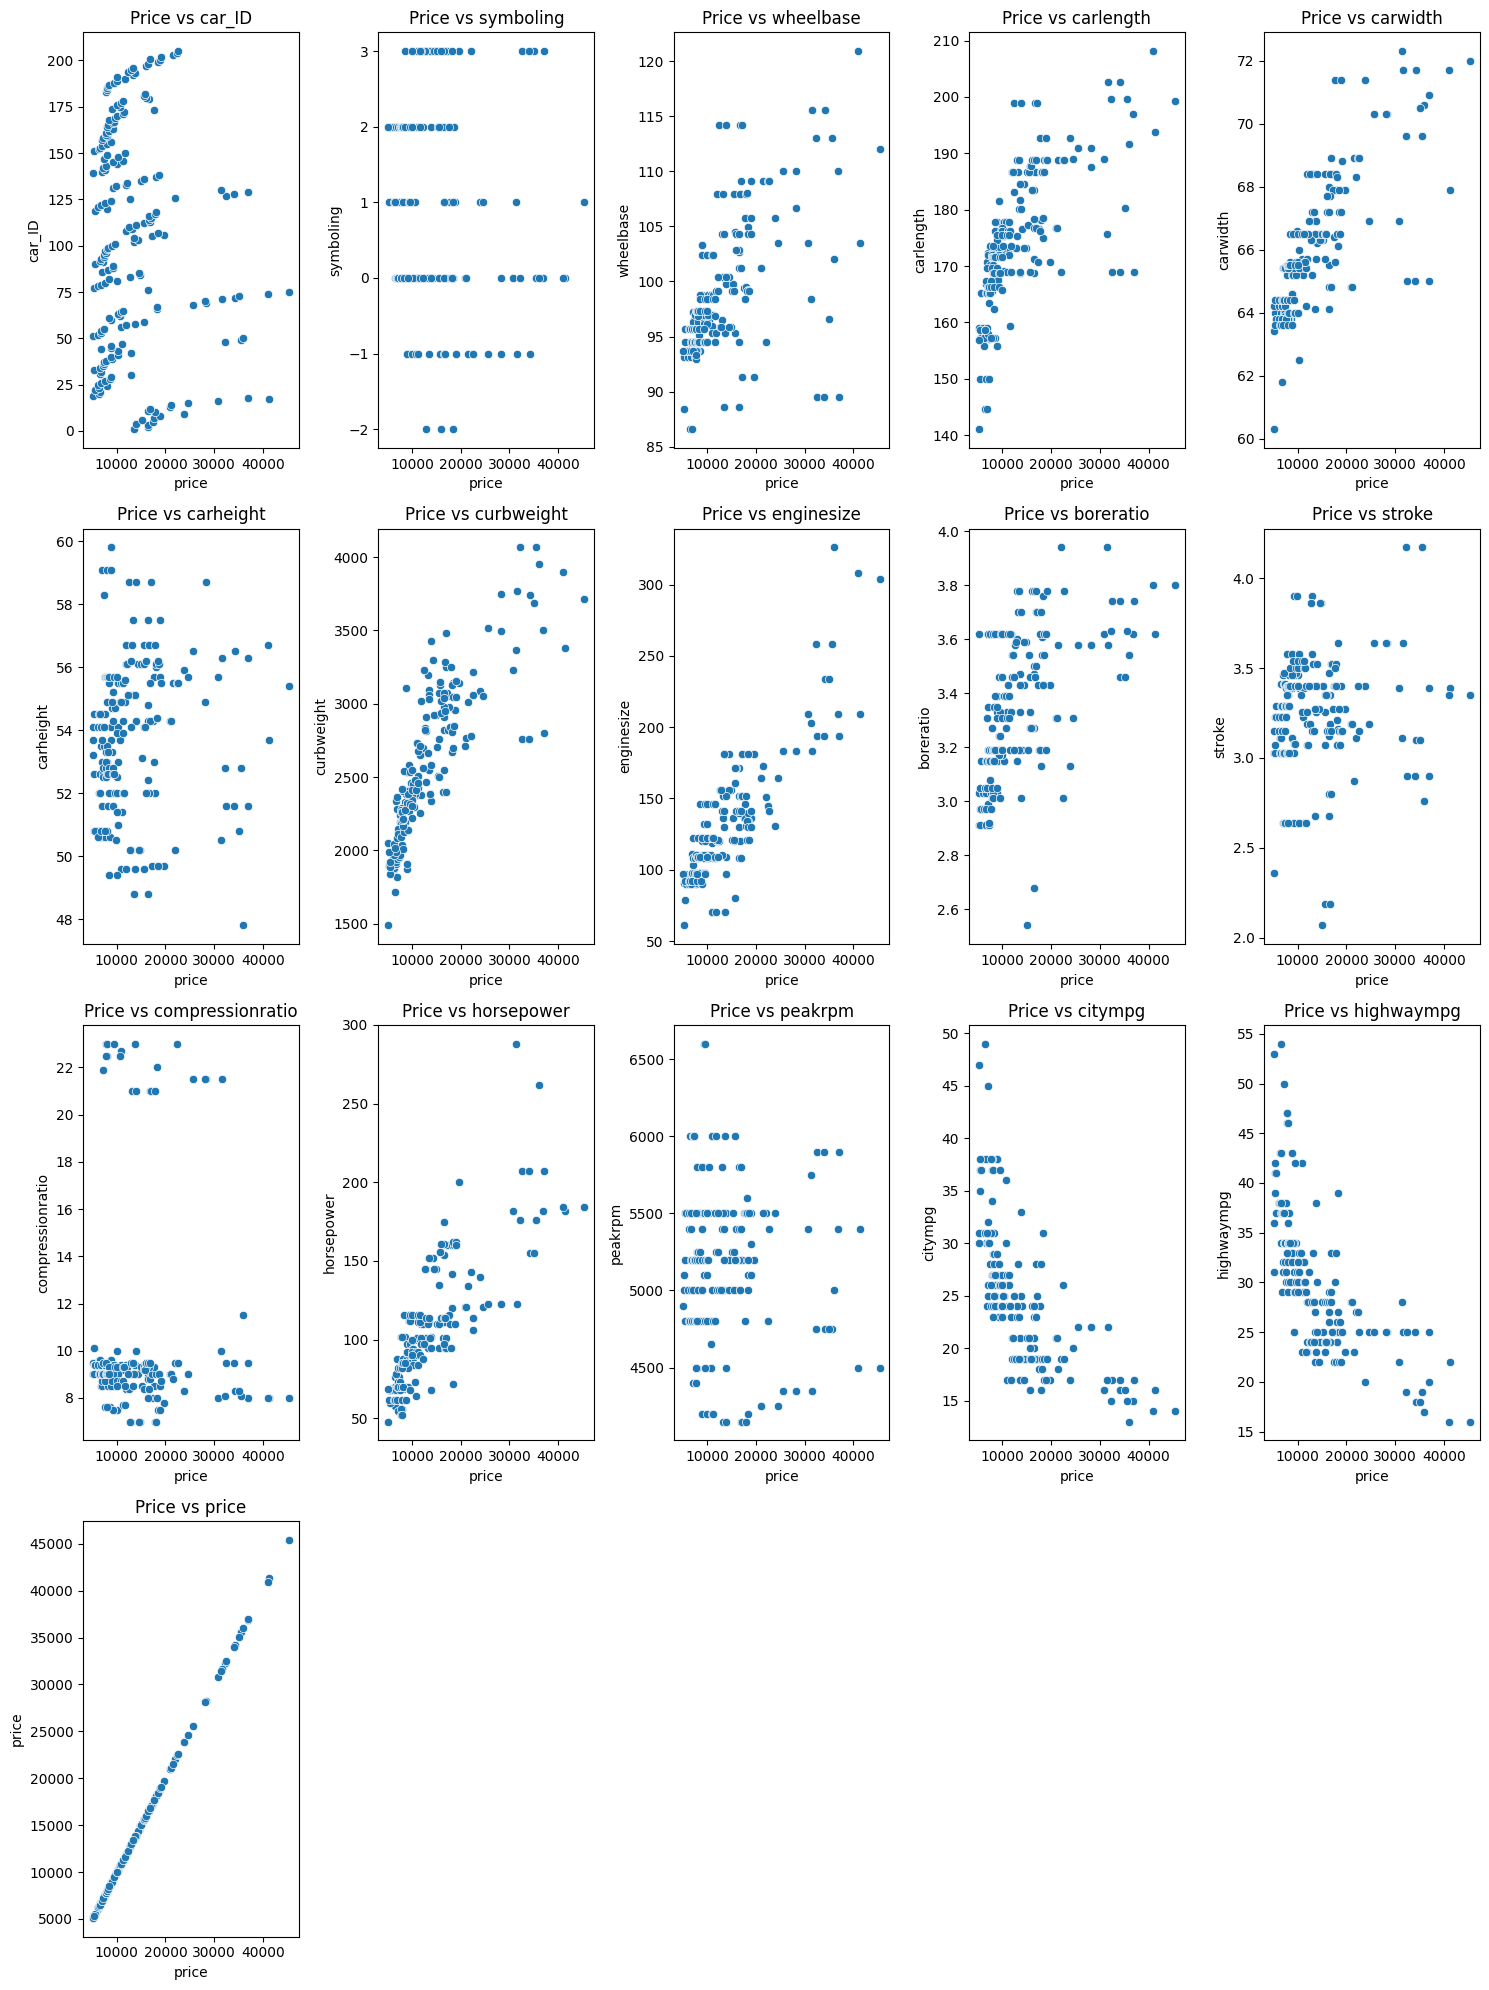

In [8]:
plt.figure(figsize=(15, 20))

# Создание диаграмм рассеивания для каждой числовой переменной относительно алкоголя
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.scatterplot(data=df, x='price', y=column)
    plt.title(f'Price vs {column}')

plt.tight_layout()
plt.show()


По матрице корреляции можно сделать вывод, что такие признаки, как compressionratio, peakrpm, symboling, stroke, carheight не будут выбраны как признаки, которые влияют на целевую переменную Price. Также у этих признаков прослеживается ненормальное распределение. Признаки Comressionratio и stroke имеют выбросы

Car_ID также не подойдёт. Нам никак не подойдёт уникальный номер машины для предсказания цены

Признак boreratio имеет достаточно сильную корреляцию (0.55), но данные на диаграмме рассеивания достаточно сильно разбросаны, поэтому этот признак тоже следует дропнуть

Признаки Boreratio и wheelbase имеют практически одинаковую корреляцию, но wheelbase имеет более нормальное распределение, поэтому его можно оставить

In [9]:
object_columns  = df.select_dtypes(include=['object']).columns # выбираем категориальные колонки
object_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [10]:
df.fueltype = df.fueltype.astype('category')
df.aspiration = df.aspiration.astype('category')
df.doornumber = df.carbody.astype('category')
df.drivewheel = df.drivewheel.astype('category')
df.enginelocation = df.enginelocation.astype('category')
df.enginetype = df.enginetype.astype('category')
df.cylindernumber = df.cylindernumber.astype('category')
df.fuelsystem = df.fuelsystem.astype('category')
df.carbody = df.carbody.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

CarName не будет использоваться, так как это уникальное значение

EngineLocation, CylinderNumber, Aspiration, Doornumber не будет использоваться, так как они не особо важно

In [11]:
y = df.price
df_num = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']]
df_num

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,88.6,168.8,64.1,2548,130,111,21,27
1,88.6,168.8,64.1,2548,130,111,21,27
2,94.5,171.2,65.5,2823,152,154,19,26
3,99.8,176.6,66.2,2337,109,102,24,30
4,99.4,176.6,66.4,2824,136,115,18,22
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,114,23,28
201,109.1,188.8,68.8,3049,141,160,19,25
202,109.1,188.8,68.9,3012,173,134,18,23
203,109.1,188.8,68.9,3217,145,106,26,27


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [12]:
from sklearn.preprocessing import LabelEncoder

df_cat = df[['fuelsystem', 'enginetype', 'drivewheel', 'carbody', 'fueltype']]

le = LabelEncoder()

df_cat['fuelsystem'] = le.fit_transform(df_cat['fuelsystem'])
df_cat['enginetype'] = le.fit_transform(df_cat['enginetype'])
df_cat['drivewheel'] = le.fit_transform(df_cat['drivewheel'])
df_cat['carbody'] = le.fit_transform(df_cat['carbody'])
df_cat['fueltype'] = le.fit_transform(df_cat['fueltype'])
df_cat

<ipython-input-12-2f91f3314f21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['fuelsystem'] = le.fit_transform(df_cat['fuelsystem'])
<ipython-input-12-2f91f3314f21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['enginetype'] = le.fit_transform(df_cat['enginetype'])
<ipython-input-12-2f91f3314f21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,fuelsystem,enginetype,drivewheel,carbody,fueltype
0,5,0,2,0,1
1,5,0,2,0,1
2,5,5,2,2,1
3,5,3,1,3,1
4,5,3,0,3,1
...,...,...,...,...,...
200,5,3,2,3,1
201,5,3,2,3,1
202,5,5,2,3,1
203,3,3,2,3,0


In [13]:
df_sign = pd.concat([df_num, df_cat], axis=1)
df_sign.fuelsystem = df_sign.fuelsystem.astype('category') # из-за le слетает категория, восстановим её
df_sign.enginetype = df_sign.enginetype.astype('category')
df_sign.drivewheel = df_sign.drivewheel.astype('category')
df_sign.carbody = df_sign.carbody.astype('category')
df_sign.fueltype = df_sign.fueltype.astype('category')
df_sign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   wheelbase   205 non-null    float64 
 1   carlength   205 non-null    float64 
 2   carwidth    205 non-null    float64 
 3   curbweight  205 non-null    int64   
 4   enginesize  205 non-null    int64   
 5   horsepower  205 non-null    int64   
 6   citympg     205 non-null    int64   
 7   highwaympg  205 non-null    int64   
 8   fuelsystem  205 non-null    category
 9   enginetype  205 non-null    category
 10  drivewheel  205 non-null    category
 11  carbody     205 non-null    category
 12  fueltype    205 non-null    category
dtypes: category(5), float64(3), int64(5)
memory usage: 15.1 KB


In [14]:
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df):
    # Проверка на наличие необходимых столбцов
    required_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'fuelsystem', 'enginetype', 'drivewheel', 'carbody', 'fueltype']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df_sign.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Dummies
    fuel_system_dummies = pd.get_dummies(df_transformed['fuelsystem'], prefix='fsystem')
    engine_type_dummies = pd.get_dummies(df_transformed['enginetype'], prefix='etype')
    drive_wheel_dummies = pd.get_dummies(df_transformed['drivewheel'], prefix='dwheel')
    car_body_dummies = pd.get_dummies(df_transformed['carbody'], prefix='cbody')
    fuel_type_dummies = pd.get_dummies(df_transformed['fueltype'], prefix='ftype')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, fuel_system_dummies, engine_type_dummies, drive_wheel_dummies, car_body_dummies, fuel_type_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df_sign[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'fuelsystem', 'enginetype', 'drivewheel', 'carbody', 'fueltype']])
df_new = pd.concat([df_research, df['price'], ], axis=1)
df_new

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fuelsystem,enginetype,...,dwheel_1,dwheel_2,cbody_0,cbody_1,cbody_2,cbody_3,cbody_4,ftype_0,ftype_1,price
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.869568,-2.865105,...,0,1,1,0,0,0,0,0,1,13495.0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.869568,-2.865105,...,0,1,1,0,0,0,0,0,1,16500.0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.264536,-0.953012,-0.691627,0.869568,1.886890,...,0,1,0,0,1,0,0,0,1,16500.0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.053668,-0.186865,-0.109354,0.869568,-0.013908,...,1,0,0,0,0,1,0,0,1,13950.0
4,0.107110,0.207256,0.230001,0.516807,0.218885,0.275883,-1.106241,-1.273900,0.869568,-0.013908,...,0,0,0,0,0,1,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,0.250533,-0.340094,-0.400490,0.869568,-0.013908,...,0,1,0,0,0,1,0,0,1,16845.0
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.416637,-0.953012,-0.837195,0.869568,-0.013908,...,0,1,0,0,0,1,0,0,1,19045.0
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.757535,-1.106241,-1.128332,0.869568,1.886890,...,0,1,0,0,0,1,0,0,1,21485.0
203,1.721873,1.198549,1.398245,1.273437,0.435538,0.047732,0.119594,-0.546059,-0.126306,-0.013908,...,0,1,0,0,0,1,0,1,0,22470.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_research
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [16]:
#LinearRegression

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [17]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 1979.0610401560325,
 'MSE': 6531973.499593111,
 'R2': 0.8904726632303084,
 'mape (reverted - % верно угаданых)': 83.44310459021041,
 'mape (original - % ошибок)': 16.556895409789597}

In [24]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 2744.487346500208,
 'MSE': 14713014.678641832,
 'R2': 0.813627244790706,
 'mape (reverted - % верно угаданых)': 73.32435698020726,
 'mape (original - % ошибок)': 26.675643019792744}

In [19]:
coefficients = model.coef_
coefficients

array([  971.26458912, -1509.04216751,  1682.11996343,  1824.01615657,
        2709.62552681,  2425.69609586, -1144.19750269,   642.22914679,
        -685.44098467,   994.63069763,   406.36753494, -1154.80561875,
         445.44960899,   463.51795171,   618.82746944,   765.10703958,
       -3957.26580259,  1211.80297956, -1229.06653   ,  1681.62728332,
        2142.06478053, -2940.65629781, -1073.36001499,  1625.5937758 ,
        2184.14668404, -4147.28188694,  2209.49295937,  -154.78842362,
          84.11910849,    70.66931513,  1223.7153082 ,    32.96435039,
       -2338.30248616,   672.49955669,   409.12327088,   765.10703958,
        -765.10703958])

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    float64
 4   enginesize  205 non-null    float64
 5   horsepower  205 non-null    float64
 6   citympg     205 non-null    float64
 7   highwaympg  205 non-null    float64
 8   fuelsystem  205 non-null    float64
 9   enginetype  205 non-null    float64
 10  drivewheel  205 non-null    float64
 11  carbody     205 non-null    float64
 12  fsystem_0   205 non-null    uint8  
 13  fsystem_1   205 non-null    uint8  
 14  fsystem_2   205 non-null    uint8  
 15  fsystem_3   205 non-null    uint8  
 16  fsystem_4   205 non-null    uint8  
 17  fsystem_5   205 non-null    uint8  
 18  fsystem_6   205 non-null    uint8  
 19  fsystem_7   205 non-null    u

In [ ]:
coefficients = model.coef_

# Названия признаков
feature_names = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'fuelsystem', 'enginetype', 'drivewheel', 'carbody', 'fsystem_0',
                'fsystem_1', 'fsystem_2', 'fsystem_3', 'fsystem_4', 'fsystem_5', 'fsystem_6', 'fsystem_7', 'etype_0', 'etype_1', 'etype_2', 'etype_3', 'etype_4', 'etype_5', 'etype_6', 'dwheel_0', 'dwheel_1', 'dwheel_2', 'cbody_0'
                 'cbody_1', 'cbody_2', 'cbody_3', 'cbody_4', 'ftype_0', 'ftype_1']

# Визуализация коэффициентов
plt.figure(figsize=(100, 20))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

KeyError: ignored

<Figure size 10000x2000 with 0 Axes>

In [29]:
bad_model = compute_regression(df_sign, y) # Прогнозирование на всей выборке
y_pred_bad = bad_model.predict(df_sign)

compute_metrics(y, y_pred_bad)

{'MAE': 2331.261551755465,
 'MSE': 10403465.203053668,
 'R2': 0.8361928232166099,
 'mape (reverted - % верно угаданых)': 82.16148440369066,
 'mape (original - % ошибок)': 17.838515596309332}

In [23]:
pd.DataFrame({'y': y, 'y_pred': y_pred_bad})

,y,y_pred
0,13495.0,12688.227835
1,16500.0,12688.227835
2,16500.0,19534.499357
3,13950.0,10606.549131
4,17450.0,13104.221780
...,...,...
200,16845.0,17735.691414
201,19045.0,21085.319077
202,21485.0,22433.244598
203,22470.0,19930.045198


In [26]:
from sklearn.neighbors import KNeighborsRegressor

def compute_knn(X, y):
  # Создание и обучение модели knn
  model = KNeighborsRegressor()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [27]:
model = compute_knn(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 1656.8804878048782,
 'MSE': 6623392.5818292685,
 'R2': 0.8889397591840995,
 'mape (reverted - % верно угаданых)': 88.70786361829776,
 'mape (original - % ошибок)': 11.292136381702228}

In [28]:
model = compute_knn(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 2253.3113902439027,
 'MSE': 15085763.945792414,
 'R2': 0.8089055538634248,
 'mape (reverted - % верно угаданых)': 86.0684829508169,
 'mape (original - % ошибок)': 13.931517049183089}

In [31]:
good_model = compute_knn(df_sign, y) # Прогнозирование на всей выборке
y_pred_good = good_model.predict(df_sign)

compute_metrics(y, y_pred_good)

{'MAE': 1921.833331707317,
 'MSE': 8771172.657879,
 'R2': 0.8618939937680482,
 'mape (reverted - % верно угаданых)': 86.27404114966114,
 'mape (original - % ошибок)': 13.725958850338863}

In [32]:
pd.DataFrame({'y': y, 'y_pred': y_pred_good})

,y,y_pred
0,13495.0,11614.4000
1,16500.0,11614.4000
2,16500.0,14601.4000
3,13950.0,10061.2000
4,17450.0,14703.4000
...,...,...
200,16845.0,16471.8000
201,19045.0,18539.6334
202,21485.0,18404.2000
203,22470.0,16592.0000


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [35]:
class LinearRegres:
  def linear_regression(self, X, y):
    self.X = X
    self.y = y
    learning_rate=0.01
    max_iter=1000
    m = len(y)
    X = np.c_[np.ones(m), X]  # добавляем колонку для intercept
    theta = np.zeros(X.shape[1])
    prev_theta = np.zeros(X.shape[1])
    unchanged_count = 0

    for iteration in range(max_iter):
        gradients = -2/m * X.T.dot(y - X.dot(theta))
        prev_theta = theta.copy()
        theta -= learning_rate * gradients

        # Проверка на изменение коэффициентов
        # Упрощенный пример реализации
        # нейросетевого early_stopping https://keras.io/api/callbacks/early_stopping/
        if np.allclose(prev_theta, theta):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= 5:
            break
    print('коэфциенты регрессии: ', theta)
    return X.dot(theta) # скалярное произведение вектора наблюдений и коэфциентов


X = np.array(X_train)
y = np.array(y_train)